The scsd (symmetry-coordinate structural decomposition) program is a method of describing the concerted distortions of molecules in crystal structures using the idealised point group symmetry. This can be used for a number of purposes - including structure description, comparison and generation. This notebook will run through how to analyse individual structures, use collections of structures to analyse molecular charge, and generate conformations of a common unit for use in landscape generator.
Firstly, we'll import the tools and run a simple analysis of xanthene, from the Hicks group at ANU. (CSD: BEVRON)

In [3]:
# for testing purposes only
# import sys, os
# sys.path.append(os.path.join(os.getcwd(), "..",".."))

# importing the module
from scsd import scsd

# imports the data from a file
bevron = scsd.import_pdb('./data/bevron.pdb')

# creates the object
scsdm = scsd.scsd_matrix(bevron, model = 'xanthene')

# performs the calculation
scsdm.calc_scsd(by_graph=True, bhopping=True)

# reports the simple version of the results
print(scsdm.simple_scsd())


{'A1': 0.8918, 'A2': 0.2925, 'B1': 0.1965, 'B2': 3.837}


this shows us how the simplest version of this analysis might be initialised. From this point, one may look at 1. the conformation, 2. the resulting symmetry and 3. similar compounds that have been described in the literature. 
The conformation shown in Figure 1 has a pronounced folding character - "B<sub>2</sub>"

C:\Users\ckingsbury\AppData\Local\Temp\ipykernel_12176\3764631013.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



CCDC link,scsd link,√Σ(S(1)-S(2))2
POFQIN,POFQIN,0.123 Å
NUCMAC,NUCMAC,0.152 Å
MUWJIZ,MUWJIZ,0.167 Å
PESMOP,PESMOP,0.168 Å
IBOKUI,IBOKUI,0.168 Å


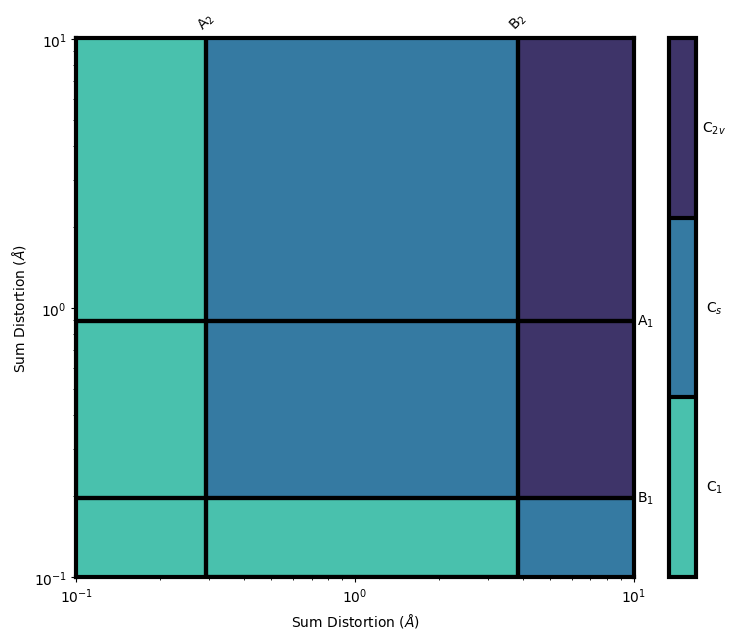

In [4]:
# displaying the figure
fig1 = scsdm.scsd_plotly(as_type='fig')
fig1.show()

%matplotlib inline
fig2 = scsdm.mondrian(as_type='fig', cmap = 'mako_r')
fig2.show()

from IPython.display import display, HTML
display(HTML(scsdm.compare_table().partition('<button')[0]))

so, for the above material we might say that the conformation is 'folded', with a B<sub>2</sub> value of 3.84 Angstroms of sum atom movement, and a pinched O-side induced by the metal centre chelate.
The apparent symmetry is <i>C<sub>s</sub></i>. This diaza-xanthene exhibits a conformation similar to those of the common XANTPHOS ligand (POFQIN, NUCMAC), and less than the maximum observed distortion of this type (NIDYAD, [doi:10.1038/s41586-018-0037-y](http://dx.doi.org/10.1038/s41586-018-0037-y)). 

Were we to desire more in-depth analysis, we can pull up the scsd_collection object for xanthene. We'll recalculate the data we need from the already minimised and assigned coordinates, allowing use of 'bypass' to speed things up.

In [5]:
xan = scsd.scsd_collection('xanthene')

xan.plot_pca('B2')
xan.gen_simple_df(bypass=True)
xan.gen_complex_df()
xan.pca_kdeplot('B2')

from this we can see that the measured conformations are beween the 'flat' main cluster at zero, and the usual bent cluster around 5 Angstroms. Were we to want to see those distorted by twisting instead, we can pull up the "A2" figure, which shows only smaller distortions usually observed. One can also see these data at www.kingsbury.id.au/scsd_model_ext/xanthene

Now we may have a structure which has no equivalent model. Here's where the model creation routines might come in - we'll make one for aza-bodipy below. The BODIPY itself has an interesting variability in how it coordinates the central boron depending on the presence of the 1,3,5,7-tetramethyl motif. We'll use HUYBAF as the model.
1. Download the data from the CSD, COD, PDB or other source
2. Delete the atoms outside of the aza-bodipy core. This can be accomplished with a text editor, using the mercury "Edit Structure" tool (free), or in CrystalMaker (paid)
3. Save this structure as a .pdb file
I've done the above and huybaf can be loaded from the data folder

In [19]:
huybaf_ats = scsd.import_pdb('./data/huybaf.pdb')
huybaf = scsd.yield_model(huybaf_ats, 'C2v', bhopping = True)
azabodipy = scsd.scsd_model('azabodipy', huybaf, 'C2v')
azabodipy.plotly_plot_model()

This should resemble an idealised azaBODIPY molecule. It it looks odd, rerun with bhopping = True.
This can also be accomplished using www.kingsbury.id.au/scsd_new_model with the above 'huybaf.pdb' and copying the data at the bottom of that page. This will have the advantage of making the azabodipy model available on the webserver.
Now, our new molecule that we might be interested in is deviating from a plane - and we can look for those molecules through ConQuest - HUYBAF02 is actually strongly distorted! We can presume that this is due to aromatic interactions. We can run this analysis using our new model as below. This shows that zero and two are very closely related - less than 1% change in conformation from 100K to 173K in the same polymorph, but a bigger change (~1.3 &#x212B;) with huybaf01 which, while having the same spacegroup, is a different polymorph.

In [26]:
huybaf_m = scsd.scsd_matrix(huybaf_ats, model = azabodipy)
huybaf_m.calc_scsd(bhopping = True, by_graph = False)
huybaf_m1 = scsd.scsd_matrix(scsd.import_pdb('./data/huybaf01.pdb'), model = azabodipy)
huybaf_m1.calc_scsd(bhopping = True, by_graph = False)
huybaf_m2 = scsd.scsd_matrix(scsd.import_pdb('./data/huybaf02.pdb'), model = azabodipy)
huybaf_m2.calc_scsd(bhopping = True, by_graph = False)

fig = huybaf_m.scsd_plotly(as_type = 'fig')
print('huybaf')
display(HTML(huybaf_m.html_table()))
print('huybaf01')
display(HTML(huybaf_m1.html_table()))
print('huybaf02')
display(HTML(huybaf_m2.html_table()))

fig.show()

huybaf


Symm,Sum (Å)
A1,0.00
A2,0.14
B1,0.07
B2,2.46


huybaf01


Symm,Sum (Å)
A1,0.20
A2,0.63
B1,0.08
B2,1.83


huybaf02


Symm,Sum (Å)
A1,0.04
A2,0.16
B1,0.08
B2,2.49


We're going to look at how one might analyse an entire collection of structures. This is enabled strongly by using the csd-python-api, but is also possible without, only requiring the crystla structure data is provided in a format compatible with scsd_collection object.
The example we'll use is "Robson's Ligand" - before Prof. Richard Robson was known for establishing the principles of net-based design of coordination polymers (AKA MOFs), these ligands were an ongoing fascination for novel catalytic and electronic behaviour provided by coordination of two metals simultaneously. See https://doi.org/10.1016/0020-1650(72)80078-3 
The model will be provided by running PISPCO through the interface at kingsbury.id.au/scsd_new_model and thereafter deposited at https://www.kingsbury.id.au/scsd_model/robsons-ligand
The filtered motif ".sd" is able to be prepared quite easily using motif search in Mercury (csd-materials / search / crystal packing feature), but can also be prepared from data in the COD or PDB using motif searching. I've selected only those examples that coordinate two metal centres (1021 examples)

In [7]:
import numpy as np
#pispco.pdb robsons-ligand 20240510
robsons_ligand = scsd.scsd_model('robsons-ligand', np.array([['-0.0', '-0.0', '0.8074', 'C'], ['1.216', '-0.0', '0.088', 'C'], ['1.1743', '0.0', '-1.3227', 'C'], ['0.0', '0.0', '-2.0387', 'C'], ['-1.1743', '0.0', '-1.3227', 'C'], ['-1.216', '-0.0', '0.088', 'C'], ['0.0', '0.0', '-3.5531', 'C'], ['2.5512', '-0.0', '0.6603', 'C'], ['-2.5512', '-0.0', '0.6603', 'C'], ['2.8782', '-0.0', '1.8978', 'N'], ['-2.8782', '-0.0', '1.8978', 'N'], ['-0.0', '-0.0', '2.1377', 'O']]), 'C2v' , maxdist = 1.75, mondrian_limits = [-1.0, -1.0])
coll = scsd.scsd_collection(robsons_ligand)
df = coll.sd_file_to_simple_df("./data/robsons.sd", by_graph = True, verbose = True)

1/1021:ABIYEQ
2/1021:ADUDAH
3/1021:AFULIA
4/1021:AFULOG
5/1021:AHICAV
6/1021:AHICAV01
7/1021:AHICEZ
8/1021:AHICID
9/1021:AHICOJ
10/1021:AHICUP
11/1021:AKEPAH
12/1021:ALAFEA
13/1021:ALIQAO
14/1021:ALIQES
15/1021:ALIQIW
16/1021:ALIQOC
17/1021:APTHCB
18/1021:AQIHUE
19/1021:AQIJAM
20/1021:AQUFUO
21/1021:AQUGAV
22/1021:AQUGEZ
23/1021:ASUNEH
24/1021:ASUNIL
25/1021:ASUXOD
26/1021:AVUKEH
27/1021:AWESIE
28/1021:AWESOK
29/1021:AXARAV
30/1021:BACLAT
31/1021:BAJJAY
32/1021:BAJJEC
33/1021:BAJJIG
34/1021:BAJJOM
35/1021:BAMDAV
36/1021:BAMDEZ
37/1021:BAMDID
38/1021:BAMLAD
39/1021:BAMLEH
40/1021:BAMLIL
41/1021:BAMQIR
42/1021:BAMQOX
43/1021:BENNEQ
44/1021:BEVYEJ
45/1021:BEVYIN
46/1021:BEZWUA
47/1021:BIGMEJ
48/1021:BIPQEA
49/1021:BIRRED
50/1021:BIWVOT
51/1021:BOCRET
52/1021:BOCRIX
53/1021:BOCROD
54/1021:BOFBIJ
55/1021:BOFBUV
56/1021:BOFGIP
57/1021:BOHGEK
58/1021:BOLBUC
59/1021:BOLCAJ
60/1021:BOLCEN
61/1021:BOLCIR
62/1021:BOWKED
63/1021:BUBKUG
64/1021:BUHCOY
65/1021:BUHGUI
66/1021:BUHHAP
67/1021:BUHHET
68

This should take about 3-4 minutes to complete, and may have residual errors - it is advised to use "bhop = True" for analysis that will be published, and scrutinising every errant data point.
Nonetheless, we can inspect how these deformations occur, with special notice to isotropic expansion and contraction of the metal-binding atoms, as this will be dependent on metal identity and strongly affect properties where there are chelates, for example.

In [8]:
coll.gen_pca(2)
df = coll.gen_complex_df()
coll.plot_pca(scale = 3.0)
fig = coll.pca_kdeplot("A1")
import plotly.express as px
import pandas as pd
ano_df = pd.read_csv('./data/robsons.csv')
ano_lookup = " ,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,Fr,Ra,Ac,Th,Pa,U".split(',')
ano_repl = {name:int(ano) for name,ano in ano_df[['NAME','ano(ANO1)']].values}
asym_repl = {name:ano_lookup[int(ano)] for name,ano in ano_df[['NAME','ano(ANO1)']].values}

fig.data[1].hovertext = [f"{x} {asym_repl.get(x,'??')}" for x in fig.data[1].hovertext]
df['asym'] = df['name'].apply(lambda x: asym_repl.get(x, '??'))
df['ano_f'] = df['name'].apply(lambda x: ano_repl.get(x, 0)%15)

expr = px.scatter(df, x = 'A1(1)', y = 'A1(2)', color = 'ano_f', color_continuous_scale='tropic')
fig.add_trace(expr.data[0])
fig.show()

We can't see any strong dependence on metal centre identity; this is understandable as the majority of these systems involve Cu and Zn. Those with extra rings on the 2,6-positions (i.e. FUNDUP) and N-N or N-O bonds (i.e. UZANOB) are generally expanded; those with macrocycles (i.e. RUYGUL) generally contracted, though this is hardly a rule. Isolated points tend to have misassigned chemistry or erroneous crystallography.

Our final section will show how to generate conformations of the units, such as those above. We're using tetrathiafulvalene - this structure has conformational change with charge and temperature, and one may want to interpolate, extrapolate or visualise this process.

In [9]:
ttf = scsd.model_objs_dict.get('ttf')
print(ttf.generate_conformation({"Ag":[0,-0.5], "Au":[5,]}))
ttf.visualize_conformation({"B1g":[0.3,], "B1u":[-1.5,]})

[['0.64232' '-3.150865' '0.42635' 'C']
 ['-0.64232' '-3.150865' '-0.42635' 'C']
 ['0.0' '-0.6053850000000001' '0.0' 'C']
 ['-0.64232' '3.150865' '0.42635' 'C']
 ['0.64232' '3.150865' '-0.42635' 'C']
 ['0.0' '0.6053850000000001' '0.0' 'C']
 ['1.5559' '-1.64022' '0.82365' 'S']
 ['-1.5559' '-1.64022' '-0.82365' 'S']
 ['-1.5559' '1.64022' '0.82365' 'S']
 ['1.5559' '1.64022' '-0.82365' 'S']]
